## 1、加载路透社数据集

In [2]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words = 10000)

查看数据集中的训练样本数和测试样本数

In [3]:
print(f"train_data's length : {len(train_data)}")
print(f"test_data's length : {len(test_data)}")

train_data's length : 8982
test_data's length : 2246


将数字进行解码

In [4]:
word_index = reuters.get_word_index()
index_word = dict([(value, key) for key,value in word_index.items()])
decoded_review = ' '.join([index_word.get(i-3, '?') for i in train_data[0]])

查看第一条新闻点的原始数据、解码后的信息以及对应的标签 

In [5]:
print(train_data[0])
print(decoded_review)
print(train_labels[0])

[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]
? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3
3


## 2、数据的预处理
不能直接将整数列表直接输入神经网络，需要将整数列表转换为张量  
one-hot编码，将其转换为0、1的张量  
然后网络的第一次层可以使用Dense层

In [6]:
import numpy as np

def vectorize_sequences(sequences, dimension = 10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

In [7]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

标签向量化

In [8]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

3、构建网络

In [9]:
from keras import models, layers

network = models.Sequential()
network.add(layers.Dense(64, activation = 'relu', input_shape = (10000, )))
network.add(layers.Dense(64, activation = 'relu'))
network.add(layers.Dense(46, activation = 'sigmoid'))

绘制网络拓扑图

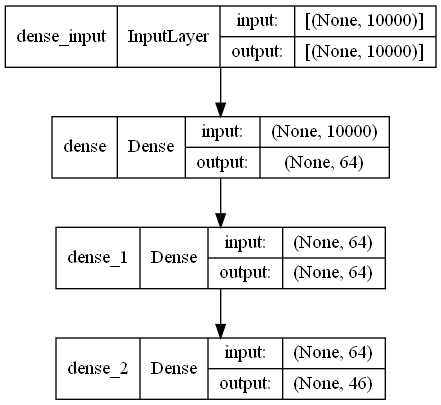

In [10]:
from tensorflow.keras.utils import plot_model

plot_model(network, show_shapes = True)

4、编译网络

In [11]:
network.compile(optimizer = 'rmsprop',
                loss = 'categorical_crossentropy',
                metrics = ['accuracy'])

5、留出验证集

In [12]:
x_val = x_train[:1000]
y_val = y_train[:1000]

x_train = x_train[1000:]
y_train = y_train[1000:]

6、训练模型

In [13]:
history = network.fit(x_train, y_train, epochs = 20, batch_size = 512, validation_data = (x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 49ms/step - loss: 2.6308 - accuracy: 0.5105 - val_loss: 1.7976 - val_accuracy: 0.6360
Epoch 2/20
16/16 [==============================] - 1s 41ms/step - loss: 1.4622 - accuracy: 0.7055 - val_loss: 1.3191 - val_accuracy: 0.7040
Epoch 3/20
16/16 [==============================] - 1s 33ms/step - loss: 1.0713 - accuracy: 0.7724 - val_loss: 1.1687 - val_accuracy: 0.7520
Epoch 4/20
16/16 [==============================] - 0s 31ms/step - loss: 0.8402 - accuracy: 0.8252 - val_loss: 1.0429 - val_accuracy: 0.7750
Epoch 5/20
16/16 [==============================] - 1s 32ms/step - loss: 0.6663 - accuracy: 0.8641 - val_loss: 0.9841 - val_accuracy: 0.7860
Epoch 6/20
16/16 [==============================] - 1s 37ms/step - loss: 0.5307 - accuracy: 0.8913 - val_loss: 0.9285 - val_accuracy: 0.8050
Epoch 7/20
16/16 [==============================] - 1s 40ms/step - loss: 0.4244 - accuracy: 0.9118 - val_loss: 0.9183 - val_accuracy: 0.8050
Epoch 8/20
16

7、绘制验证损失和训练损失

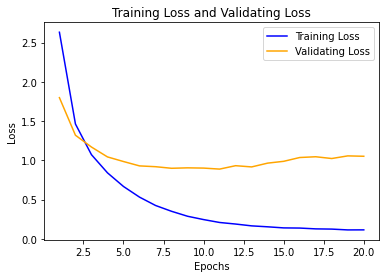

In [14]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'blue', label = 'Training Loss')
plt.plot(epochs, val_loss, 'orange', label = 'Validating Loss')
plt.title('Training Loss and Validating Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

8、绘制言训练精度和验证精度

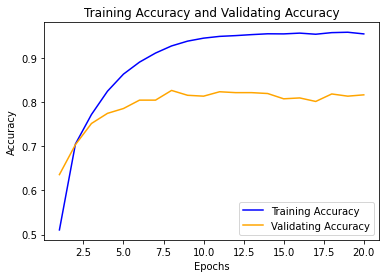

In [15]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

plt.plot(epochs, accuracy, 'blue', label = 'Training Accuracy')
plt.plot(epochs, val_accuracy, 'orange', label = 'Validating Accuracy')
plt.title('Training Accuracy and Validating Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

9、从头开始训练一个模型

In [16]:
from keras import models, layers

network = models.Sequential()
network.add(layers.Dense(64, activation = 'relu', input_shape = (10000, )))
network.add(layers.Dense(64, activation = 'relu'))
network.add(layers.Dense(46, activation = 'sigmoid'))

network.compile(optimizer = 'rmsprop',
                loss = 'categorical_crossentropy',
                metrics = ['accuracy'])

network.fit(x_train, y_train, epochs = 9, validation_data = (x_val, y_val))
results = network.evaluate(x_test, y_test)

Epoch 1/9
250/250 [==============================] - 4s 14ms/step - loss: 1.4415 - accuracy: 0.6942 - val_loss: 1.0121 - val_accuracy: 0.7750
Epoch 2/9
250/250 [==============================] - 4s 14ms/step - loss: 0.7304 - accuracy: 0.8381 - val_loss: 0.8482 - val_accuracy: 0.8170
Epoch 3/9
250/250 [==============================] - 4s 15ms/step - loss: 0.4605 - accuracy: 0.9007 - val_loss: 0.8826 - val_accuracy: 0.8270
Epoch 4/9
250/250 [==============================] - 3s 14ms/step - loss: 0.3216 - accuracy: 0.9312 - val_loss: 0.9227 - val_accuracy: 0.8270
Epoch 5/9
250/250 [==============================] - 3s 14ms/step - loss: 0.2471 - accuracy: 0.9424 - val_loss: 1.0467 - val_accuracy: 0.8250
Epoch 6/9
250/250 [==============================] - 3s 13ms/step - loss: 0.2156 - accuracy: 0.9506 - val_loss: 1.0509 - val_accuracy: 0.8200
Epoch 7/9
250/250 [==============================] - 3s 13ms/step - loss: 0.1889 - accuracy: 0.9528 - val_loss: 1.1106 - val_accuracy: 0.8250
Epoch 

使用完全随机的分类器

In [31]:
import copy

test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hit_array = np.array(test_labels) == np.array(test_labels_copy)

In [32]:
float(np.sum(hit_array)) / len(test_labels)

0.19056099732858414

10、构建查看多分类问题的classification_report

In [17]:
prediction = network.predict(x_test)
prediction = [np.argmax(p) for p in prediction]

In [18]:
from sklearn.metrics import classification_report

print(classification_report(test_labels, prediction))

              precision    recall  f1-score   support

           0       0.56      0.75      0.64        12
           1       0.72      0.72      0.72       105
           2       0.82      0.70      0.76        20
           3       0.91      0.94      0.92       813
           4       0.75      0.89      0.81       474
           5       0.00      0.00      0.00         5
           6       1.00      0.86      0.92        14
           7       1.00      0.33      0.50         3
           8       0.69      0.66      0.68        38
           9       0.83      0.76      0.79        25
          10       0.95      0.67      0.78        30
          11       0.55      0.75      0.64        83
          12       0.20      0.08      0.11        13
          13       0.63      0.59      0.61        37
          14       0.09      0.50      0.15         2
          15       0.50      0.11      0.18         9
          16       0.72      0.72      0.72        99
          17       0.83    

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [19]:
import pandas as pd

pd.crosstab(test_labels, prediction, rownames = 'labels', colnames = 'predicts')

AssertionError: arrays and names must have the same length